<a href="https://colab.research.google.com/github/jerniusZendrato/penelitian/blob/master/Diabetes_experiment_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd #pandas = handling dataset
import numpy as np
import matplotlib.pyplot as plt #matplotlib, seaborn = membuat styling confusion matrix
import seaborn as sn #matplotlib, seaborn = membuat styling confusion matrix
from sklearn import svm #svm = membuat SVM classifier
from sklearn.metrics import classification_report, confusion_matrix #lassification_report = membuat classifier report yang berisi accuracy, f-1 score, confusion_matrix = membuat confusion matrix
from sklearn.model_selection import train_test_split #train_test_split = membagi dataset menjadi training dan testing data



In [3]:
df = pd.read_csv('diabetess.csv')

df.head()


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
X = df[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']]
#X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23


In [5]:
y = df['Diabetic']
#y = df['Outcome']
y

0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [9]:
#menggunakan SVM library untuk membuat SVM classifier
#classifier = svm.SVC(kernel = 'linear', C=100)
classifier = svm.SVC(kernel = 'rbf', gamma=0.001, C=1)
#classifier = svm.SVC(kernel = 'rbf', C=100)
#classifier = svm.SVC(kernel='poly', C=100)
#classifier = svm.SVC(kernel='poly', degree=4, C=100)

#memasukkan training data kedalam classifier
classifier.fit(X_train, y_train)

#memasukkan testing data ke variabel y_predict
y_predict = classifier.predict(X_test)

#menampilkan classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2002
           1       0.80      0.75      0.77       998

    accuracy                           0.85      3000
   macro avg       0.84      0.83      0.83      3000
weighted avg       0.85      0.85      0.85      3000



In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print("Akurasi model: {:.2f}%".format(accuracy*100))

Akurasi model: 85.40%


Text(95.72222222222221, 0.5, 'Truth')

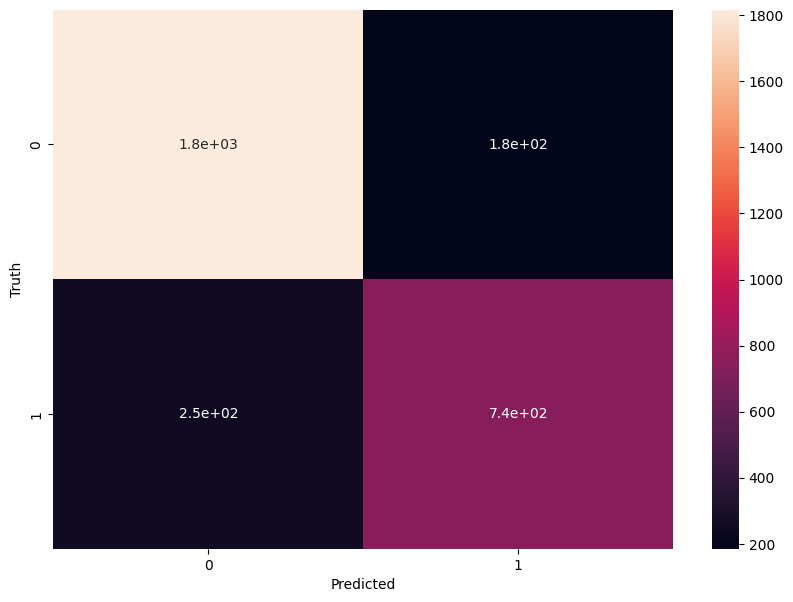

In [11]:
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, y_predict)

#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [13]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


#memanggil kelas
naive_bayes = GaussianNB(var_smoothing=0.00001)
#naive_bayes = GaussianNB()
#naive_bayes = BernoulliNB()
#naive_bayes = MultinomialNB()
#naive_bayes = MultinomialNB(alpha=0.5)

#Menyesuaikan data ke pengklasifikasi
naive_bayes.fit(X_train , y_train)

#Predict
y_predicted = naive_bayes.predict(X_test)
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2002
           1       0.73      0.62      0.67       998

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.79      3000



In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted)
print("Akurasi model: {:.2f}%".format(accuracy*100))

Akurasi model: 79.53%


Text(95.72222222222221, 0.5, 'Truth')

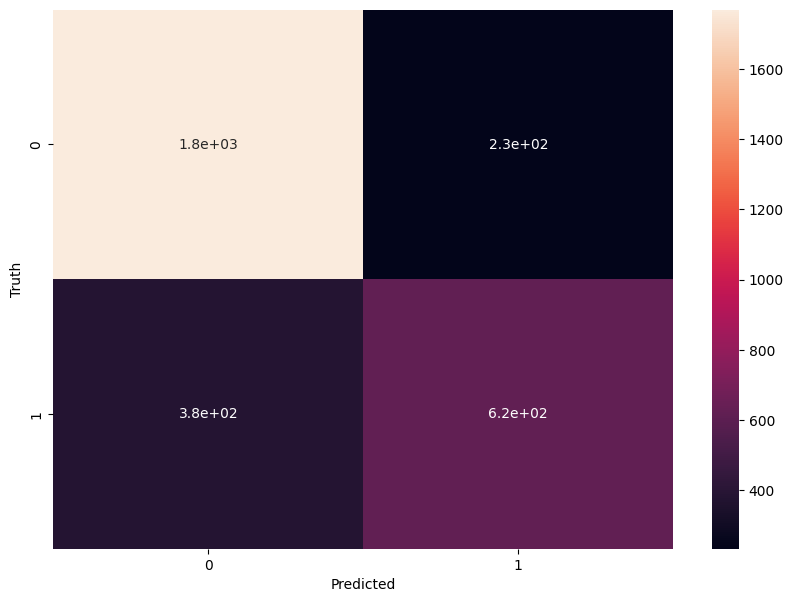

In [16]:
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, y_predicted)

#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')